In [18]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.71,Apartamento


In [4]:
dados['Valor'].mean()

3465.402299430185

#### isin() Selecionando as linhas na tabela de estatistica 

In [21]:
bairros = ['Centro', 'Higienópolis', 'Cachambi', 'Grajaú']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [6]:
dados['Bairro'].drop_duplicates() # vai mostra os bairros que selecionei

0          Centro
1    Higienópolis
2        Cachambi
3          Grajaú
Name: Bairro, dtype: object

In [7]:
grupo_bairro = dados.groupby('Bairro') 

In [8]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
grupo_bairro.groups

{'Cachambi': [2, 42, 188, 190, 400, 481, 1058, 1286, 1428, 1500, 1687, 1980, 2040, 2240, 2332, 2358, 2383, 2909, 3144, 3217, 3245, 3253, 3398, 3430, 3585, 3587, 4073, 4079, 4087, 4099, 4210, 4263, 4301, 4438, 4527, 4568, 4622, 4628, 4773, 4775, 4828, 4932, 4939, 5014, 5104, 5234, 5279, 5292, 5645, 5740, 5755, 5895, 5976, 6109, 6190, 6214, 6231, 6348, 6362, 6667, 6730, 6891, 6895, 6928, 7065, 7068, 7153, 7421, 7425, 7503, 7632, 7894, 7900, 8347, 8367, 8561, 8569, 8782, 8877, 8883, 9140, 9313, 9597, 9924, 10147, 10321, 10323, 10348, 10625, 10668, 11013, 11115, 11377, 11431, 11564, 11641, 11726, 11801, 11845, 11972, ...], 'Centro': [0, 27, 48, 135, 234, 447, 508, 636, 730, 850, 852, 867, 1006, 1055, 1293, 1327, 1414, 1452, 1460, 1551, 1678, 1700, 1737, 1908, 2027, 2304, 2512, 2588, 2597, 2739, 2776, 2858, 2924, 2996, 3032, 3229, 3342, 3374, 3429, 3446, 3656, 3750, 3882, 3892, 3909, 3928, 3949, 3988, 3990, 4122, 4153, 4203, 4395, 4424, 4476, 4507, 4590, 4601, 4633, 4642, 4669, 4752, 4758, 

## Calculando as medias

In [10]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Cachambi -> 1157.1742424242425
Centro -> 1242.3391812865498
Grajaú -> 1636.111111111111
Higienópolis -> 1006.25


## Outra Forma
DataFrame das medias 

In [11]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Cachambi,1157.17,452.77
Centro,1242.34,423.66
Grajaú,1636.11,579.01
Higienópolis,1006.25,185.50


## Estatistica Descritivas

In [12]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Cachambi,132.0,1157.17,351.49,600.0,900.0,1100.0,1300.0,2800.0
Centro,342.0,1242.34,855.53,400.0,800.0,1000.0,1400.0,12000.0
Grajaú,144.0,1636.11,735.71,650.0,1237.5,1500.0,1700.0,7000.0
Higienópolis,16.0,1006.25,409.42,700.0,800.0,875.0,1100.0,2400.0


In [13]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Minino', 'max': 'Maximo'})

,Minino,Maximo
Bairro,,
Cachambi,600.0,2800.0
Centro,400.0,12000.0
Grajaú,650.0,7000.0
Higienópolis,700.0,2400.0


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Medio do aluguel por Bairro')

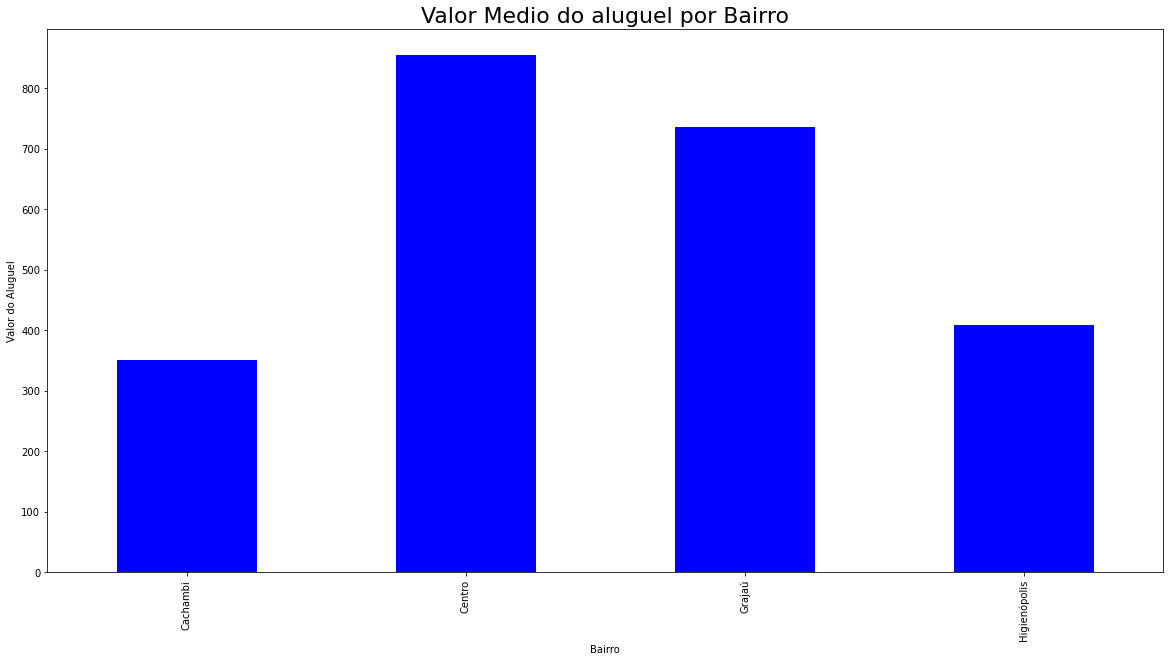

In [15]:
fig = grupo_bairro['Valor'].std().plot.bar(color =  'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Medio do aluguel por Bairro', {'fontsize': 22})

## Grafico para ver a media 

Text(0.5, 1.0, 'Valor Medio do aluguel por Bairro')

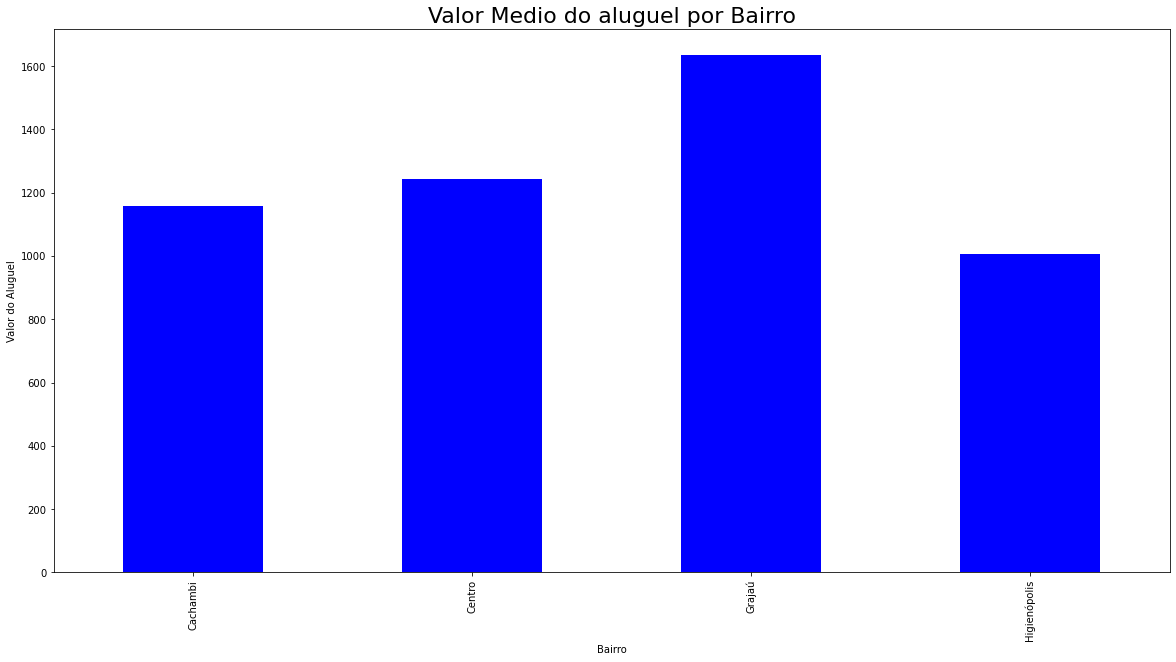

In [16]:
fig = grupo_bairro['Valor'].mean().plot.bar(color =  'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Medio do aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Medio do aluguel por Bairro')

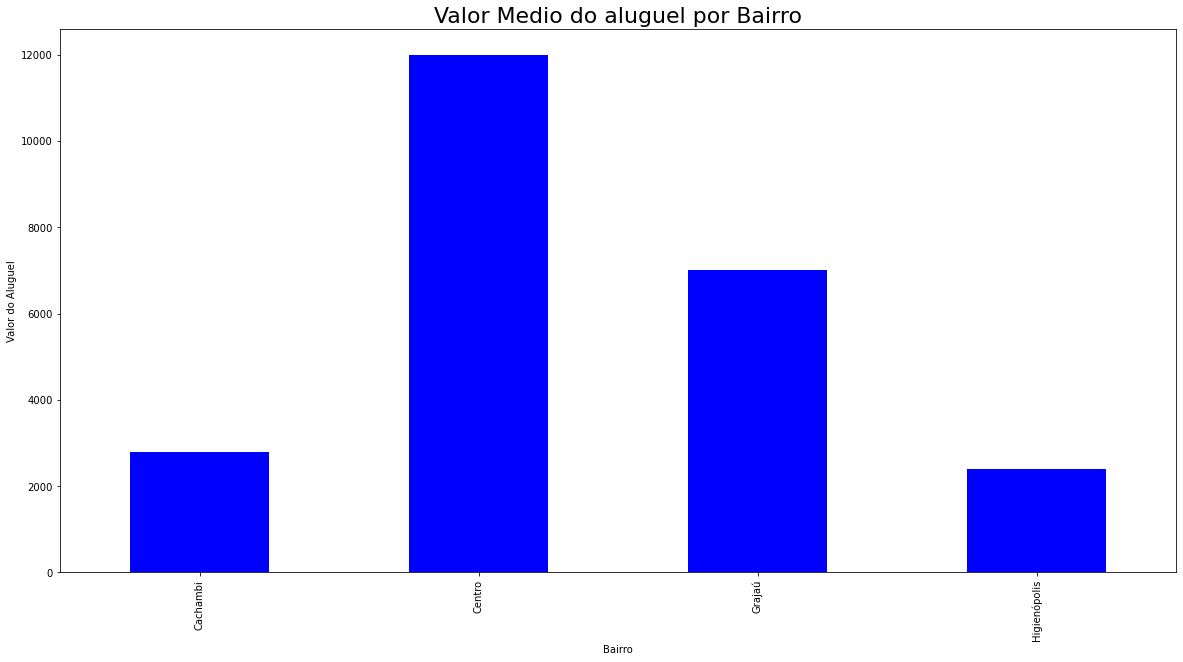

In [17]:
fig = grupo_bairro['Valor'].max().plot.bar(color =  'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Medio do aluguel por Bairro', {'fontsize': 22})